In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from PIL import Image

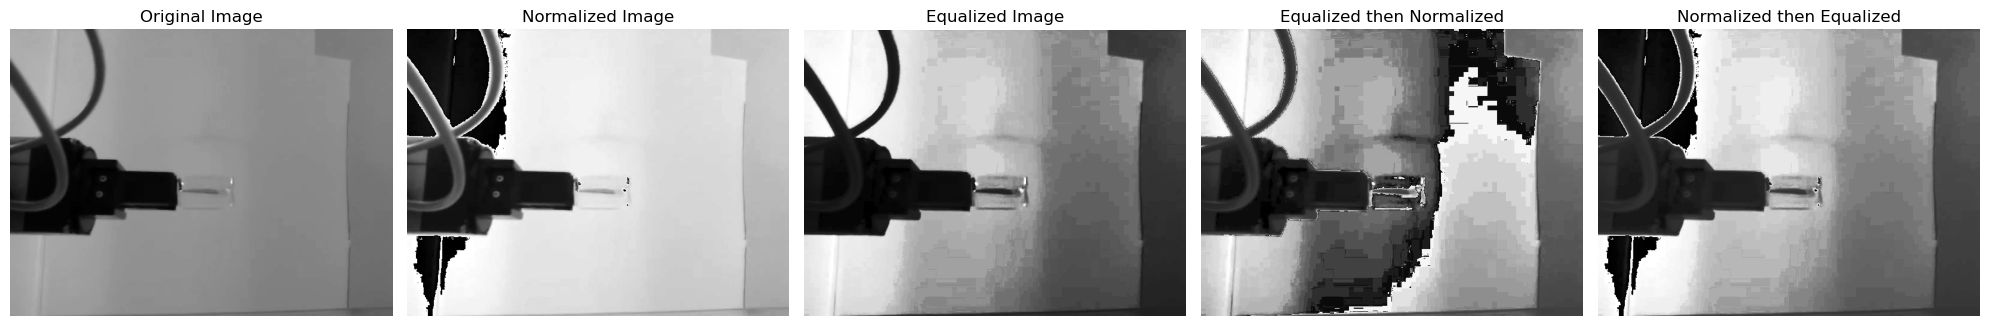

In [12]:
image_path = os.path.join('..', 'data', 'processed', '1.00_1', 'frame127.jpg')
# Original image
image_original = Image.open(image_path)

# Normalized image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
image_tensor_norm = transform(image_original)
image_normalized = transforms.ToPILImage()(image_tensor_norm)

# Equalized image
image_np = np.array(image_original.convert('L'))  # Convert to grayscale for equalization
image_equalized_np = cv2.equalizeHist(image_np)
image_equalized = Image.fromarray(image_equalized_np)

# Equalized then normalized
image_tensor_eqnorm = transform(image_equalized)
image_eqnorm = transforms.ToPILImage()(image_tensor_eqnorm)

# Normalized then equalized
image_np_norm = np.array(image_normalized.convert('L'))  # Convert to grayscale for equalization
image_normeq_np = cv2.equalizeHist(image_np_norm)
image_normeq = Image.fromarray(image_normeq_np)

# Displaying images in a single plot
fig, axes = plt.subplots(1, 5, figsize=(20, 20))

# List of images and their titles
images = [image_original, image_normalized, image_equalized, image_eqnorm, image_normeq]
titles = ['Original Image', 'Normalized Image', 'Equalized Image', 'Equalized then Normalized', 'Normalized then Equalized']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images
    ax.set_title(title)
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()